# Load Ardupilot .bin log files

These logs contains 2 chuncks of data.

- PARM: list of parameters that can be set and their values
- then there's messages, that is the values of what is actually logged (ex: battery voltage, GPS, IMU...)


## TODO: 
- document and comments

In [1]:
%matplotlib inline

In [1]:
from ardupilot_log_reader.reader import Ardupilot
# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import os
# import utm
# import math

from numpy.random import RandomState

# import random # for the canon 

In [2]:
HOME = os.getenv("HOME")
PATH2FILES = f'{HOME}/Data/Drones/Flight_Logs'
LOGNAME = '2024-05-30_10-42-49_noIMU.bin'
FULLNAME = f'{PATH2FILES}/{LOGNAME}'

In [11]:

# parser = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP', 'VISV', 'NOT_A_MESSAGE']) # adding a type not present in the log don't raise an error
parser = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP', 'VISV','MAG'])


In [12]:
type(parser.dfs)

dict

In [13]:
print(parser.dfs.keys())

dict_keys(['PARM', 'VISP', 'VISV', 'GPS', 'MAG', 'XKF1', 'XKF2'])


In [5]:
print(parser.dfs)

{'PARM':          timestamp     TimeUS             Name     Value  Default
0     1.717037e+09  264862224   FORMAT_VERSION     120.0    120.0
1     1.717037e+09  264862239    SYSID_THISMAV       1.0      1.0
2     1.717037e+09  264862255      SYSID_MYGCS     255.0    255.0
3     1.717037e+09  264862322   PILOT_THR_FILT       0.0      0.0
4     1.717037e+09  264862340  PILOT_TKOFF_ALT       0.0      0.0
...            ...        ...              ...       ...      ...
1025  1.717037e+09  457770048     STAT_RUNTIME  112282.0      NaN
1026  1.717037e+09  487770337     STAT_FLTTIME    4600.0      NaN
1027  1.717037e+09  487773100     STAT_RUNTIME  112312.0      NaN
1028  1.717037e+09  518768851     STAT_RUNTIME  112343.0      NaN
1029  1.717037e+09  548772670     STAT_RUNTIME  112373.0      NaN

[1030 rows x 5 columns], 'VISP':          timestamp     TimeUS           RTimeUS  CTimeMS           PX  \
0     1.717037e+09  264911906  1716964424716487   264908    -0.195806   
1     1.717037e+09 

In [7]:
print(parser.dfs['PARM'])

         timestamp     TimeUS             Name     Value  Default
0     1.717037e+09  264862224   FORMAT_VERSION     120.0    120.0
1     1.717037e+09  264862239    SYSID_THISMAV       1.0      1.0
2     1.717037e+09  264862255      SYSID_MYGCS     255.0    255.0
3     1.717037e+09  264862322   PILOT_THR_FILT       0.0      0.0
4     1.717037e+09  264862340  PILOT_TKOFF_ALT       0.0      0.0
...            ...        ...              ...       ...      ...
1025  1.717037e+09  457770048     STAT_RUNTIME  112282.0      NaN
1026  1.717037e+09  487770337     STAT_FLTTIME    4600.0      NaN
1027  1.717037e+09  487773100     STAT_RUNTIME  112312.0      NaN
1028  1.717037e+09  518768851     STAT_RUNTIME  112343.0      NaN
1029  1.717037e+09  548772670     STAT_RUNTIME  112373.0      NaN

[1030 rows x 5 columns]


In [8]:
print(parser.dfs['PARM'][:20])

       timestamp     TimeUS              Name     Value   Default
0   1.717037e+09  264862224    FORMAT_VERSION     120.0     120.0
1   1.717037e+09  264862239     SYSID_THISMAV       1.0       1.0
2   1.717037e+09  264862255       SYSID_MYGCS     255.0     255.0
3   1.717037e+09  264862322    PILOT_THR_FILT       0.0       0.0
4   1.717037e+09  264862340   PILOT_TKOFF_ALT       0.0       0.0
5   1.717037e+09  264862360     PILOT_THR_BHV       0.0       0.0
6   1.717037e+09  264862379      SERIAL0_BAUD     115.0     115.0
7   1.717037e+09  264862428  SERIAL0_PROTOCOL       2.0       2.0
8   1.717037e+09  264862449  SERIAL1_PROTOCOL       2.0       2.0
9   1.717037e+09  264862464      SERIAL1_BAUD    1500.0      57.0
10  1.717037e+09  264862482  SERIAL2_PROTOCOL       2.0       2.0
11  1.717037e+09  264862497      SERIAL2_BAUD      57.0      57.0
12  1.717037e+09  264862692  SERIAL3_PROTOCOL       5.0       5.0
13  1.717037e+09  264862710      SERIAL3_BAUD     230.0     230.0
14  1.7170

In [14]:
print(parser.dfs['MAG'])

         timestamp     TimeUS  I  MagX  MagY  MagZ  OfsX  OfsY  OfsZ  MOX  \
0     1.717037e+09  264951987  0   182   186   246    17    34   147    0   
1     1.717037e+09  264951987  1   298   106  -165   903   -94 -1611    0   
2     1.717037e+09  265052924  0   174   186   245    17    34   147    0   
3     1.717037e+09  265052924  1   292    97  -160   903   -94 -1611    0   
4     1.717037e+09  265153033  0   178   185   246    17    34   147    0   
...            ...        ... ..   ...   ...   ...   ...   ...   ...  ...   
4499  1.717037e+09  489864241  1   262   162  -148   903   -94 -1611    0   
4500  1.717037e+09  489964222  0    60   298   386    17    34   147    0   
4501  1.717037e+09  489964222  1   263   160  -147   903   -94 -1611    0   
4502  1.717037e+09  490064225  0    59   297   385    17    34   147    0   
4503  1.717037e+09  490064225  1   259   160  -149   903   -94 -1611    0   

      MOY  MOZ  Health          S  
0       0    0       1  264951982  
1  

In [9]:
print(parser.dfs['VISV'])

         timestamp     TimeUS           RTimeUS  CTimeMS        VX        VY  \
0     1.717037e+09  264912093  1716964424716522   264908 -0.000827  0.001344   
1     1.717037e+09  264960339  1716964424765798   264958 -0.001090  0.001138   
2     1.717037e+09  265012825  1716964424817237   265009 -0.001015  0.001159   
3     1.717037e+09  265060932  1716964424866623   265058 -0.001059  0.000744   
4     1.717037e+09  265110899  1716964424915711   265108 -0.000898  0.000380   
...            ...        ...               ...      ...       ...       ...   
4499  1.717037e+09  489842824  1716964649647048   489838  1.540815  4.547993   
4500  1.717037e+09  489889745  1716964649696191   489887  1.524032  4.421861   
4501  1.717037e+09  489942727  1716964649746912   489938  1.505512  4.362039   
4502  1.717037e+09  489992737  1716964649797679   489989  1.479072  4.268604   
4503  1.717037e+09  490042990  1716964649849802   490041  1.491498  4.424110   

            VZ  VErr  Rst  Ign  Q  
0  

In [10]:
print(parser.dfs['GPS'])

         timestamp     TimeUS  I  Status        GMS   GWk  NSats  HDop  \
0     1.717037e+09  264932392  0       4  355387400  2316     14  0.86   
1     1.717037e+09  265133428  0       4  355387600  2316     14  0.86   
2     1.717037e+09  265333650  0       4  355387800  2316     14  0.86   
3     1.717037e+09  265533440  0       4  355388000  2316     14  0.86   
4     1.717037e+09  265733315  0       4  355388200  2316     14  0.86   
...            ...        ... ..     ...        ...   ...    ...   ...   
1121  1.717037e+09  489144668  0       4  355611600  2316     16  0.75   
1122  1.717037e+09  489344906  0       4  355611800  2316     16  0.75   
1123  1.717037e+09  489544844  0       4  355612000  2316     16  0.75   
1124  1.717037e+09  489744638  0       4  355612200  2316     16  0.75   
1125  1.717037e+09  489944644  0       4  355612400  2316     16  0.75   

            Lat         Lng     Alt    Spd       GCrs     VZ  Yaw  U  
0     24.774148  121.043972  137.32  0.0

In [3]:
mydf = parser.dfs['PARM']
print(mydf[mydf['Name'].str.contains('KF')])

        timestamp     TimeUS           Name  Value  Default
74   1.717037e+09  264866885  FS_EKF_ACTION    1.0      1.0
75   1.717037e+09  264866897  FS_EKF_THRESH    0.8      0.8
405  1.717037e+09  264894882  AHRS_EKF_TYPE    3.0      3.0
965  1.717037e+09  265043942    FS_EKF_FILT    5.0      5.0


In [4]:

print(mydf[mydf['Name'].str.contains('IMU')])

        timestamp     TimeUS          Name  Value  Default
590  1.717037e+09  264910058  EK3_IMU_MASK    1.0      3.0


In [15]:
mydf_gps = parser.dfs['GPS']
mydf_visp = parser.dfs['VISP']
mydf_mag = parser.dfs['MAG']

In [15]:
print(mydf_gps[:10])

      timestamp     TimeUS  I  Status        GMS   GWk  NSats  HDop  \
0  1.717037e+09  264932392  0       4  355387400  2316     14  0.86   
1  1.717037e+09  265133428  0       4  355387600  2316     14  0.86   
2  1.717037e+09  265333650  0       4  355387800  2316     14  0.86   
3  1.717037e+09  265533440  0       4  355388000  2316     14  0.86   
4  1.717037e+09  265733315  0       4  355388200  2316     14  0.86   
5  1.717037e+09  265933329  0       4  355388400  2316     14  0.86   
6  1.717037e+09  266133257  0       4  355388600  2316     14  0.86   
7  1.717037e+09  266333402  0       4  355388800  2316     14  0.86   
8  1.717037e+09  266533387  0       4  355389000  2316     14  0.86   
9  1.717037e+09  266733363  0       4  355389200  2316     14  0.86   

         Lat         Lng     Alt    Spd  GCrs     VZ  Yaw  U  
0  24.774148  121.043972  137.32  0.053   0.0 -0.047  0.0  1  
1  24.774148  121.043972  137.39  0.027   0.0 -0.006  0.0  1  
2  24.774148  121.043972  137

In [7]:
print(mydf_gps['Yaw'])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1121    0.0
1122    0.0
1123    0.0
1124    0.0
1125    0.0
Name: Yaw, Length: 1126, dtype: float64


In [8]:
print(mydf_gps['NSats'])

0       14
1       14
2       14
3       14
4       14
        ..
1121    16
1122    16
1123    16
1124    16
1125    16
Name: NSats, Length: 1126, dtype: int64


In [9]:
nsats = mydf_gps['NSats'].to_numpy()

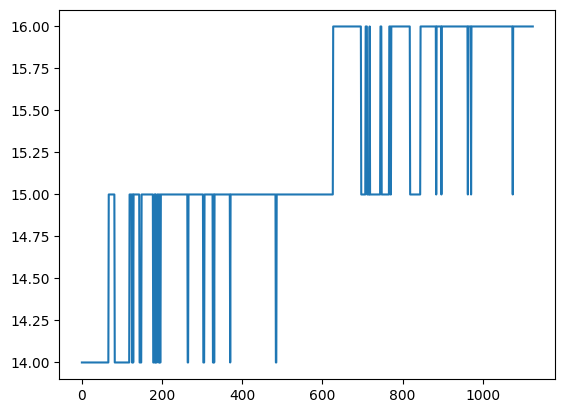

In [12]:
fig,ax = plt.subplots(1)
ax.plot(nsats)

In [31]:
type(mydf_gps['NSats'])

pandas.core.series.Series

In [16]:
print(mydf_visp[:10])

      timestamp     TimeUS           RTimeUS  CTimeMS        PX        PY  \
0  1.717037e+09  264911906  1716964424716487   264908 -0.195806 -0.109221   
1  1.717037e+09  264960113  1716964424765768   264958 -0.196072 -0.109307   
2  1.717037e+09  265012499  1716964424817206   265009 -0.196303 -0.109392   
3  1.717037e+09  265060759  1716964424866595   265058 -0.196538 -0.109488   
4  1.717037e+09  265110672  1716964424915680   265107 -0.196712 -0.109574   
5  1.717037e+09  265160771  1716964424965471   265157 -0.196892 -0.109655   
6  1.717037e+09  265210753  1716964425015935   265208 -0.196997 -0.109714   
7  1.717037e+09  265260759  1716964425066580   265258 -0.197081 -0.109782   
8  1.717037e+09  265313281  1716964425118131   265310 -0.197157 -0.109833   
9  1.717037e+09  265360829  1716964425165975   265358 -0.197160 -0.109870   

         PZ         R         P         Y  PErr  AErr  Rst  Ign  Q  
0 -0.102843  3.275280 -3.250204  0.204403   0.5   0.3    0    0  0  
1 -0.102948  3

In [17]:
print(mydf_visp[:10]['PX'])

0   -0.195806
1   -0.196072
2   -0.196303
3   -0.196538
4   -0.196712
5   -0.196892
6   -0.196997
7   -0.197081
8   -0.197157
9   -0.197160
Name: PX, dtype: float64


In [18]:
print(mydf_visp['PX'][:10])

0   -0.195806
1   -0.196072
2   -0.196303
3   -0.196538
4   -0.196712
5   -0.196892
6   -0.196997
7   -0.197081
8   -0.197157
9   -0.197160
Name: PX, dtype: float64


In [19]:
px,py,pz = mydf_visp['PX'], mydf_visp['PY'], mydf_visp['PZ']

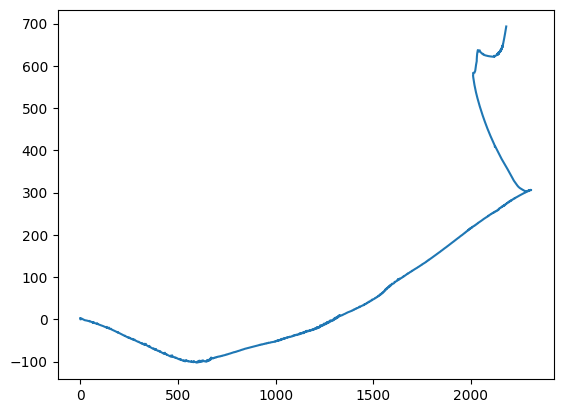

In [23]:
fig,ax = plt.subplots(1)
ax.plot(px,py)
plt.show()

In [21]:
plt.show()

In [17]:
magx,magy,magz = mydf_mag['MagX'], mydf_mag['MagY'], mydf_mag['MagZ']

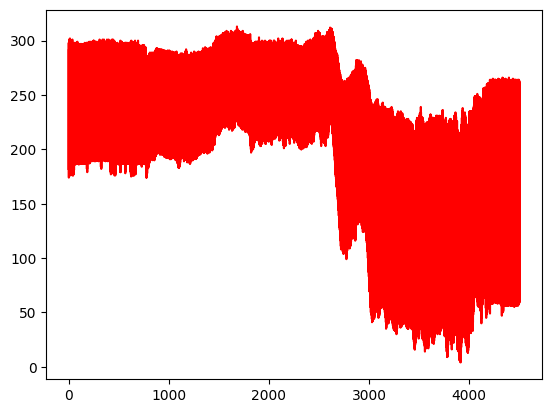

In [25]:
fig,ax = plt.subplots(1)
ax.plot(magx,'r')
# ax.plot(magx[:100],'r')
# ax.plot(magy,'g')
# ax.plot(magz[:100],'b')
plt.show()

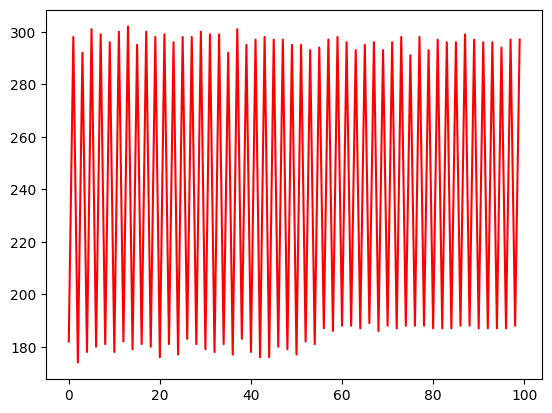

In [24]:
fig,ax = plt.subplots(1)
# ax.plot(magx,'r')
ax.plot(magx[:100],'r')
# ax.plot(magy,'g')
# ax.plot(magz[:100],'b')
plt.show()

##  Look at another log 

Stationary flight

In [32]:
PATH2FILES = f'{HOME}/Data/Drones/IMU/380_frame/31052024'
LOGNAME = 'oak_d_380frame_2min.bin'
FULLNAME = f'{PATH2FILES}/{LOGNAME}'
parser = Ardupilot.parse(FULLNAME,types=['XKF1','XKF2','GPS','VISP', 'VISV','MAG', 'IMU'])


In [35]:
mydf_gps = parser.dfs['GPS']
mydf_imu = parser.dfs['IMU']
mydf_mag = parser.dfs['MAG']

In [34]:
print(parser.dfs.keys())

dict_keys(['PARM', 'IMU', 'MAG', 'XKF1', 'XKF2', 'GPS'])


In [36]:
print(mydf_imu[:10])

   timestamp    TimeUS  I      GyrX      GyrY      GyrZ      AccX      AccY  \
0  46.876456  46876456  0  0.002082  0.000240 -0.000759  0.137422  0.009288   
1  46.876456  46876456  1 -0.000554 -0.001104  0.000995  0.239476 -0.138036   
2  46.917669  46917669  0  0.001673 -0.000427  0.000551  0.156634  0.021084   
3  46.917669  46917669  1 -0.000556 -0.000926  0.000952  0.246022 -0.136373   
4  46.958347  46958347  0  0.002114 -0.000060 -0.000202  0.146119  0.018561   
5  46.958347  46958347  1 -0.000260  0.000219  0.000663  0.238656 -0.159397   
6  46.998627  46998627  0  0.002180  0.000522  0.000306  0.147783  0.011485   
7  46.998627  46998627  1 -0.000223 -0.001364  0.000683  0.240065 -0.138333   
8  47.039208  47039208  0  0.001847 -0.000366  0.000109  0.145306  0.012130   
9  47.039208  47039208  1 -0.000600  0.001833 -0.000016  0.219151 -0.135652   

       AccZ  EG  EA          T  GH  AH   GHz   AHz  
0 -9.790380   0   0  31.522018   1   1  8001  4000  
1 -9.797957   0   0  22.

In [39]:
gyrx,gyry,gyrz = mydf_imu['GyrX'], mydf_imu['GyrY'], mydf_imu['GyrZ']
accx,accy,accz = mydf_imu['AccX'], mydf_imu['AccY'], mydf_imu['AccZ']

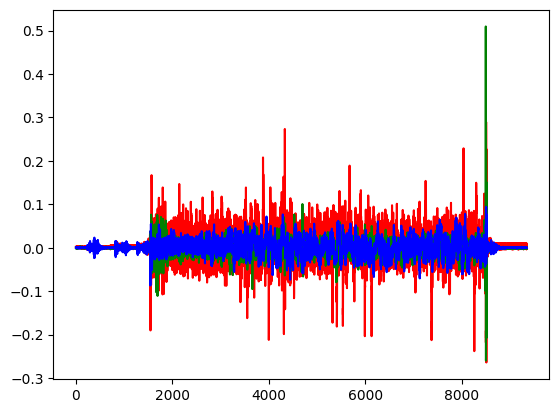

In [38]:
fig,ax = plt.subplots(1)
ax.plot(gyrx,'r')
ax.plot(gyry,'g')
ax.plot(gyrz,'b')
plt.show()

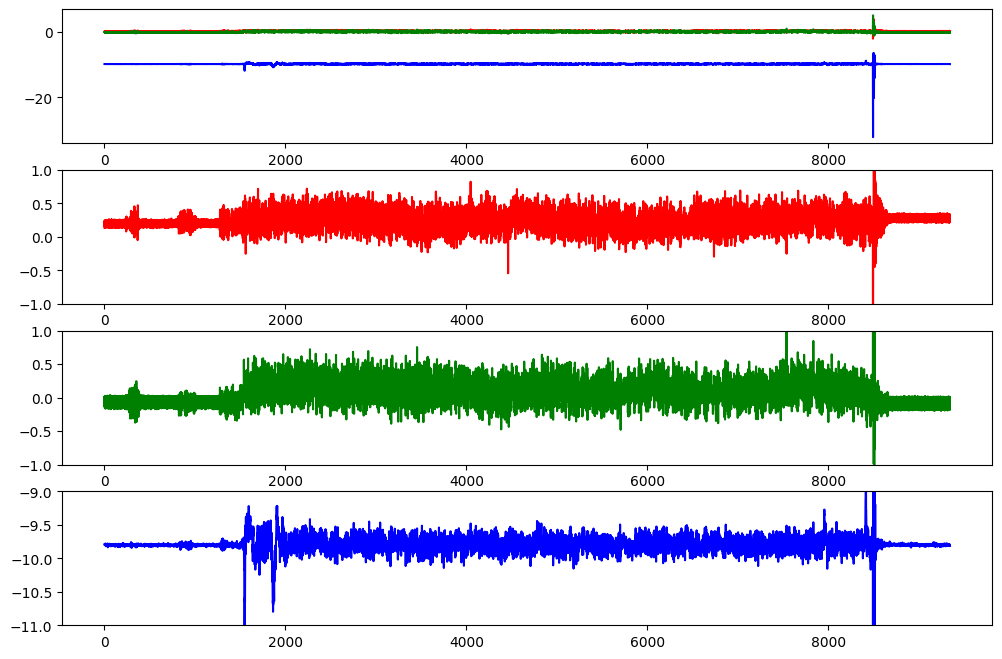

In [46]:
fig,ax = plt.subplots(4,figsize=(12,8))
ax[0].plot(accx,'r')
ax[0].plot(accy,'g')
ax[0].plot(accz,'b')
ax[1].plot(accx,'r')
ax[2].plot(accy,'g')
ax[3].plot(accz,'b')
ax[1].set_ylim(-1,1)
ax[2].set_ylim(-1,1)
ax[3].set_ylim(-11,-9)
plt.show()